# Group 4 EPA Data and Health Effects Modeling 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor

# statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot

# The effects of air particulate on mortality

# SPACE FOR EXPLANATION OF MODEL AND PROCESSES 

import cleaned and merged data from `.csv`

In [4]:
# cancer deaths 1999-2021
can = pd.read_csv('merged_mortality_epa_data/can.csv')

# pneumonia deaths 1999-2021
pneumonia = pd.read_csv('merged_mortality_epa_data/pneumonia.csv')

# heart disease deaths 1999-2021
heart_disease = pd.read_csv('merged_mortality_epa_data/heart_disease.csv')

# chronic lower respiratory disease deaths 1999-2021
cld = pd.read_csv('merged_mortality_epa_data/cld.csv')

# granger causality test results
granger_df = pd.read_csv('merged_mortality_epa_data/granger_df.csv')

Starting Poisson Regression Model for Cause:  CLD  and Counties:  ['Kern' 'Riverside' 'San Bernardino' 'San Diego'] 
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   73
Model:                            GLM   Df Residuals:                       69
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3263.9
Date:                Thu, 19 Jan 2023   Deviance:                       5907.2
Time:                        17:51:57   Pearson chi2:                 5.37e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9897
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------

,VIF,Features
0,5.909470,Good Days
1,4.659121,Days PM2.5
2,1.735197,Days NO2


,Features,Coefficients
0,Good Days,0.001408
1,Days PM2.5,0.000421
2,Days NO2,0.002669


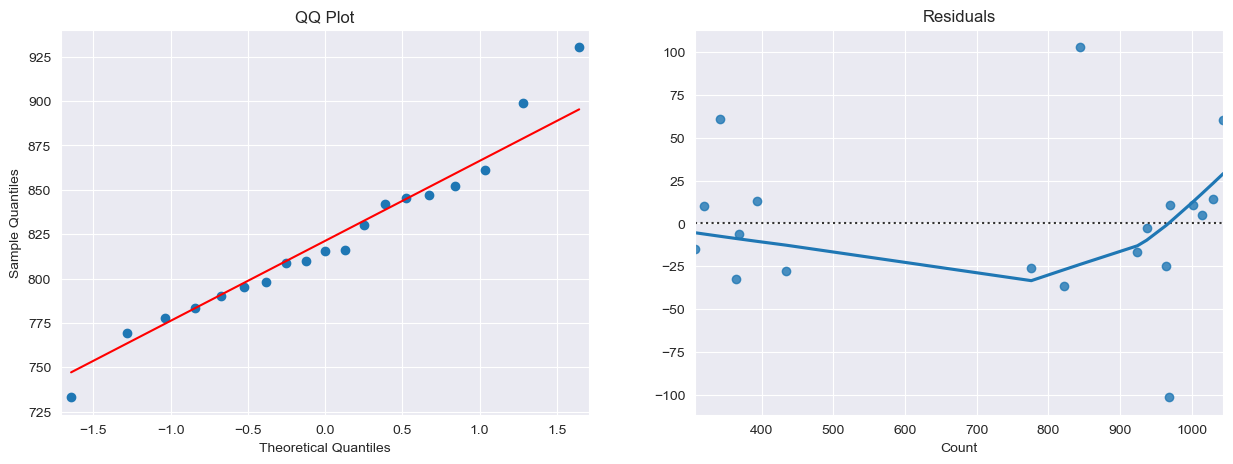

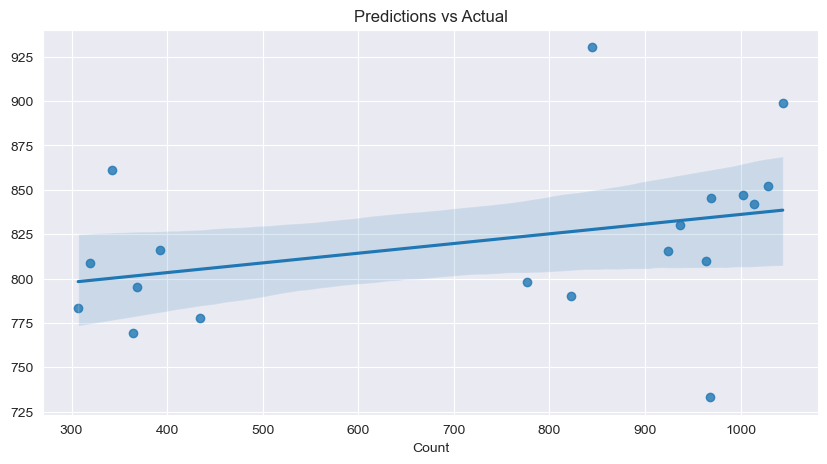

Starting Poisson Regression Model for Cause:  CAN  and Counties:  ['Kern' 'Los Angeles' 'San Bernardino' 'Tulare'] 
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   73
Model:                            GLM   Df Residuals:                       69
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76501.
Date:                Thu, 19 Jan 2023   Deviance:                   1.5231e+05
Time:                        17:51:57   Pearson chi2:                 1.68e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------

,VIF,Features
0,3.343213,Good Days
1,3.314042,Days PM2.5
2,1.366695,Days NO2


,Features,Coefficients
0,Good Days,-0.000193
1,Days PM2.5,0.028310
2,Days NO2,0.035579


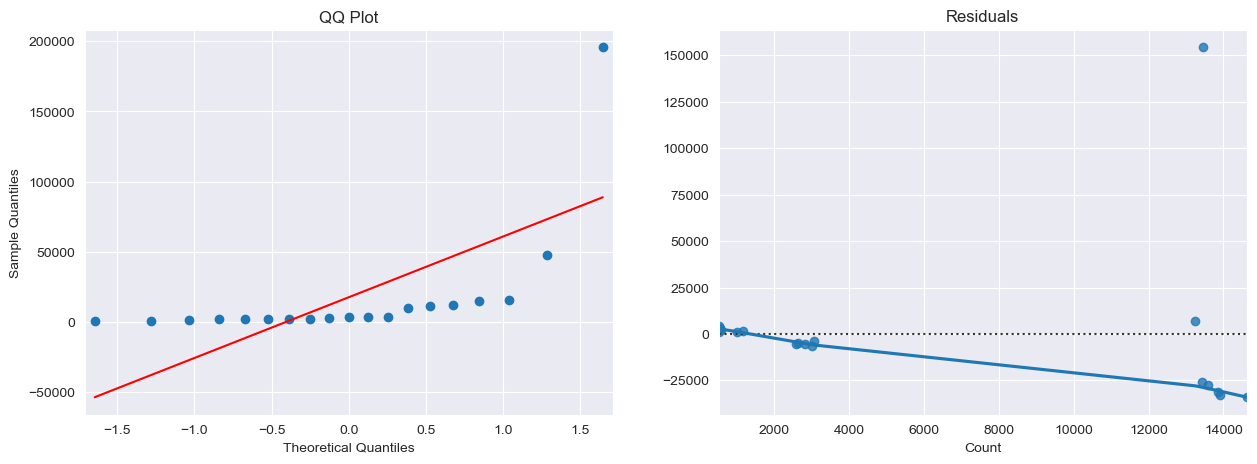

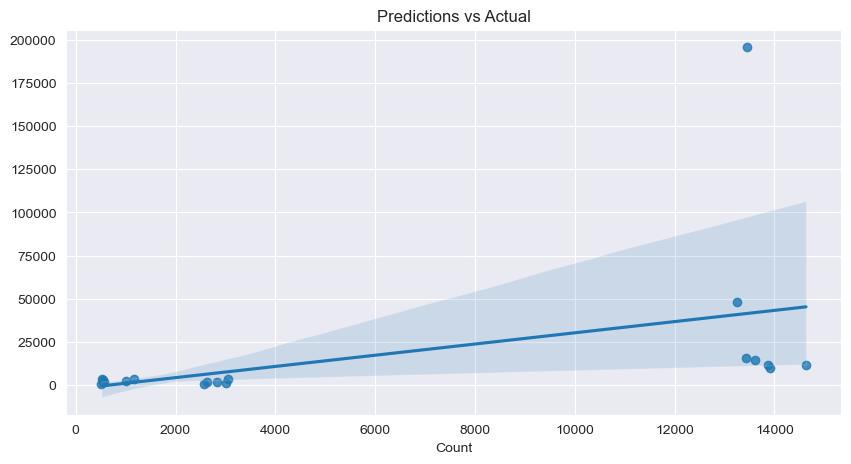

Starting Poisson Regression Model for Cause:  PNF  and Counties:  ['Kern' 'San Bernardino' 'Tulare'] 
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   55
Model:                            GLM   Df Residuals:                       51
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -594.19
Date:                Thu, 19 Jan 2023   Deviance:                       816.94
Time:                        17:51:58   Pearson chi2:                     856.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

,VIF,Features
0,4.501753,Good Days
1,3.825113,Days PM2.5
2,1.374235,Days NO2


,Features,Coefficients
0,Good Days,-0.010030
1,Days PM2.5,-0.007831
2,Days NO2,0.002740


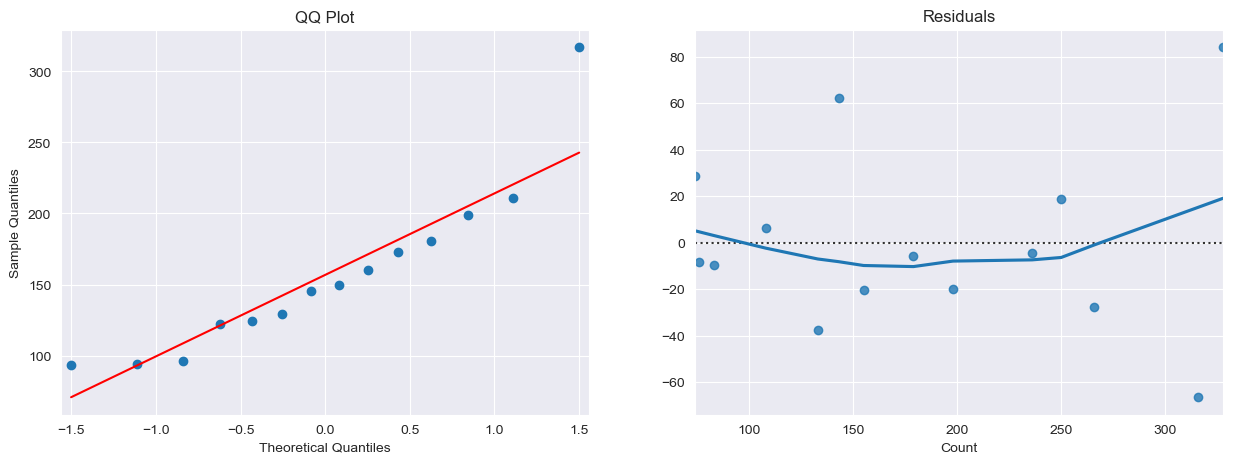

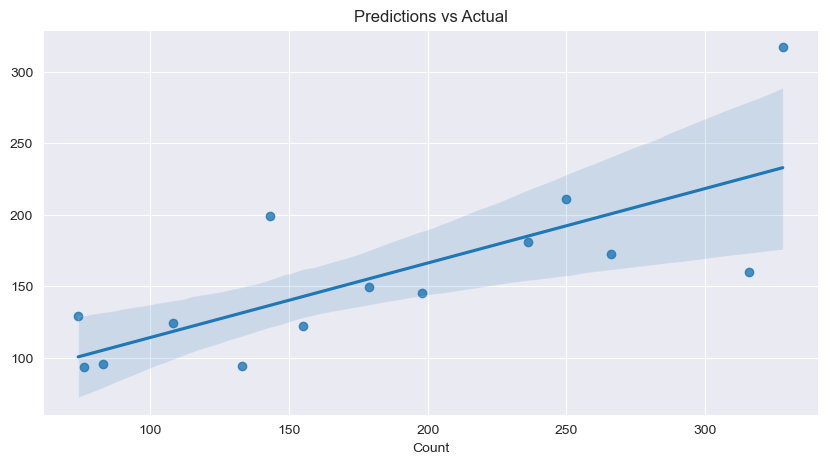

Starting Poisson Regression Model for Cause:  HTD  and Counties:  ['Imperial' 'Kern' 'Tulare'] 
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   55
Model:                            GLM   Df Residuals:                       51
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4391.7
Date:                Thu, 19 Jan 2023   Deviance:                       8327.9
Time:                        17:51:59   Pearson chi2:                 8.28e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

,VIF,Features
0,6.252933,Good Days
1,2.938141,Days PM2.5
2,3.418140,Days NO2


,Features,Coefficients
0,Good Days,-0.010116
1,Days PM2.5,0.000483
2,Days NO2,-0.009406


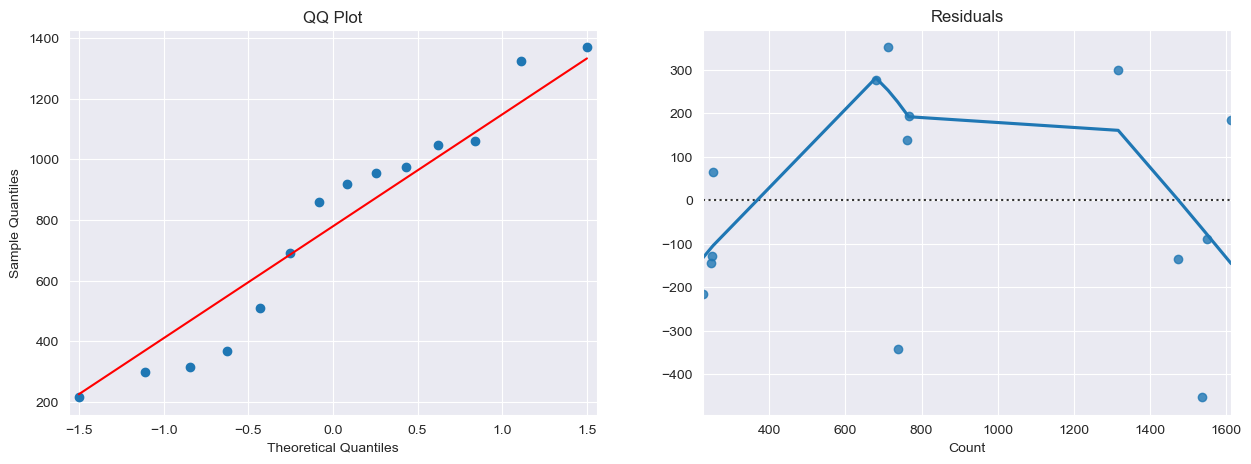

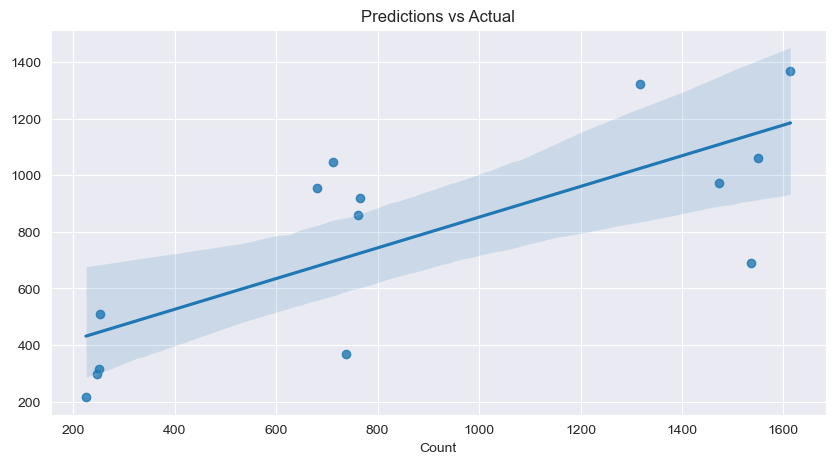

In [9]:
# poisson regression model
def poisson_regression(df,air_qual_stats):
    
    # get cause from df that is passed in and then query granger_df for counties that have that cause
    cause = df['Cause'].unique()[0]
    counties = granger_df.query('Cause == @cause')['County'].unique()
    print('Starting Poisson Regression Model for Cause: ', cause, ' and Counties: ', counties, '')

    # get data for county
    county_df = df.query(f'County in @counties')

    # get data for air quality stats
    X = county_df[air_qual_stats]
    y = county_df['Count']

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # instantiate model
    model = PoissonRegressor(max_iter=1000, alpha=0.1)

    # # s
    # model = LinearRegression()

    # fit model
    model.fit(X_train, y_train)

    # add constant
    X_train_sm = sm.add_constant(X_train)

    # instantiate model
    model_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Poisson())

    # fit model
    model_sm = model_sm.fit()

    # print model summary
    print(model_sm.summary())

    # get predictions
    y_pred = model.predict(X_test)

    # get vif
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Features'] = X.columns
    
    display(vif)

    # get coefficients
    coef = pd.DataFrame()
    coef['Features'] = X.columns
    coef['Coefficients'] = model.coef_
    
    display(coef)

    # sub plots for predictions qq plot and residuals 
    # set style 
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    # qq plot
    qqplot(y_pred, line='s', ax=ax[0])
    ax[0].set_title('QQ Plot')
    # residuals
    sns.residplot(x= y_test, y = y_pred, ax=ax[1], lowess=True)
    ax[1].set_title('Residuals')
    plt.show()

    # plot predictions vs actual
    plt.figure(figsize=(10,5))
    sns.regplot(x = y_test, y = y_pred)
    plt.title('Predictions vs Actual')
    plt.show()


for df in [cld, can, pneumonia, heart_disease]:

    poisson_regression(df, ['Good Days', 'Days PM2.5', 'Days NO2'])


# SPACE FOR INTERPRETATION OF MODEL RESULTS